In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
mean = 30
stdev = 1
sample_size = 1

# Generate random samples
sample = np.random.normal(mean, stdev, sample_size)[0]
print(sample)

29.4668848469324


In [ ]:
print(np.random.uniform(0,1))

0.38240665429704646


In [10]:
fp = 'Data/Nebraska_data.csv'
df = pd.read_csv(fp, header=0)
df.head(10)


,year,month,day,hour,Study_Site,Burrow_mean_Temperature,Burrow_stddev_Temperature,Open_mean_Temperature,Open_stddev_Temperature,Shrub_mean_Temperature,Shrub_stddev_Temperature,DateTime,Mean_StdDev
0,2022,5,29,20,Nebraska,25.961,4.435334,23.389,1.032376,22.1160,0.066468,2022-05-29 20:00:00,4.435334
1,2022,5,29,21,Nebraska,24.461,2.496843,20.887,1.033790,20.6155,0.065761,2022-05-29 21:00:00,2.496843
2,2022,5,29,22,Nebraska,23.461,1.404888,19.886,0.326683,20.1145,0.065761,2022-05-29 22:00:00,1.404888
3,2022,5,29,23,Nebraska,13.472,1.094737,13.374,0.376181,13.3530,0.417193,2022-05-29 23:00:00,1.094737
4,2022,5,30,1,Nebraska,15.968,1.052268,14.376,0.332340,13.8545,0.417900,2022-05-30 01:00:00,1.052268
5,2022,5,30,2,Nebraska,16.467,1.118083,14.626,0.685894,14.3555,0.417900,2022-05-30 02:00:00,1.118083
6,2022,5,30,3,Nebraska,16.966,1.121328,14.626,0.685894,14.6060,0.772161,2022-05-30 03:00:00,1.121328
7,2022,5,30,4,Nebraska,16.966,1.439962,14.376,0.332340,14.3555,0.417900,2022-05-30 04:00:00,1.439962
8,2022,5,30,5,Nebraska,16.467,1.723898,14.376,0.332340,14.3555,0.417900,2022-05-30 05:00:00,1.723898
9,2022,5,30,6,Nebraska,16.467,1.817992,13.875,0.332340,14.1050,0.063640,2022-05-30 06:00:00,1.817992


In [11]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Get the minimum and maximum date
min_date = df['datetime'].min()
max_date = df['datetime'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2022-05-29 20:00:00
Maximum date: 2023-07-02 00:00:00


In [14]:
365 * 24

8760

In [13]:
yearly_counts = df.groupby('year').size()
total_hours = yearly_counts.sum()

if total_hours >= 365 * 24:
    print("You have a complete 365 days' worth of data across the two years.")
else:
    print(f"You have {total_hours} hours, which is not a full 365 days.")


You have 8190 hours, which is not a full 365 days.


In [16]:
df['Shrub_stddev_Temperature'].iloc[0]

0.4930000000000012

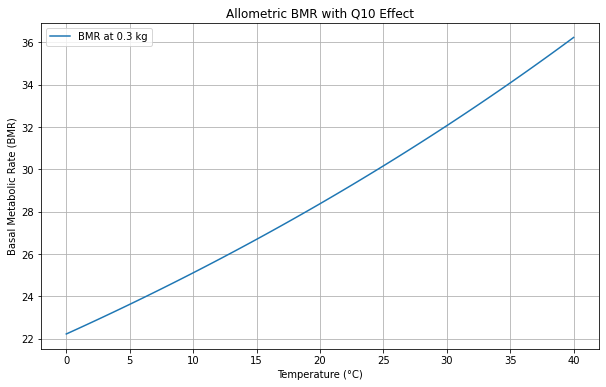

In [5]:
def allometric_bmr(mass, tref, temp, a=70, b=0.75, q10=2):
    """
    Calculate the BMR based on mass, temperature reference, and current temperature using allometric scaling.
    
    Parameters:
    mass (float): Body mass (kg)
    tref (float): Reference temperature (°C)
    temp (float): Current temperature (°C)
    a (float): Normalization constant
    b (float): Scaling exponent
    q10 (float): Q10 temperature coefficient

    Returns:
    float: Basal metabolic rate (BMR)
    """
    return a * mass**b * q10**((temp - tref) / 10)

# Example parameters
mass = 0.3  # kg
tref = 20  # °C
q10 = 1.13
temp_range = np.linspace(0, 40, 100)  # Temperature range from 0 to 40°C

# Calculate BMR for the given mass over the temperature range
bmr_values = [allometric_bmr(mass, tref, temp,q10=q10) for temp in temp_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(temp_range, bmr_values, label=f'BMR at {mass} kg')
plt.xlabel('Temperature (°C)')
plt.ylabel('Basal Metabolic Rate (BMR)')
plt.title('Allometric BMR with Q10 Effect')
plt.legend()
plt.grid(True)
plt.show()

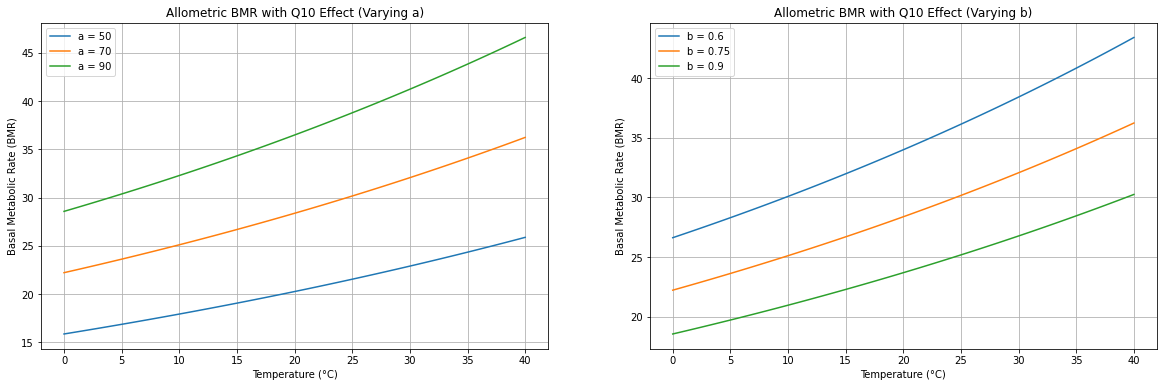

In [6]:


fig, axs = plt.subplots(1, 2, figsize=(20, 6))



# Varying a (alpha)

a_values = [50, 70, 90]

for a in a_values:

    smr_values = [allometric_smr(mass, tref, temp, a=a, q10=q10) for temp in temp_range]

    axs[0].plot(temp_range, smr_values, label=f'a = {a}')

axs[0].set_xlabel('Temperature (°C)')

axs[0].set_ylabel('Basal Metabolic Rate (BMR)')

axs[0].set_title('Allometric BMR with Q10 Effect (Varying a)')

axs[0].legend()

axs[0].grid(True)



# Varying b (beta)

b_values = [0.6, 0.75, 0.9]

for b in b_values:

    bmr_values = [allometric_bmr(mass, tref, temp, b=b, q10=q10) for temp in temp_range]

    axs[1].plot(temp_range, bmr_values, label=f'b = {b}')

axs[1].set_xlabel('Temperature (°C)')

axs[1].set_ylabel('Basal Metabolic Rate (BMR)')

axs[1].set_title('Allometric BMR with Q10 Effect (Varying b)')

axs[1].legend()

axs[1].grid(True)



plt.show()

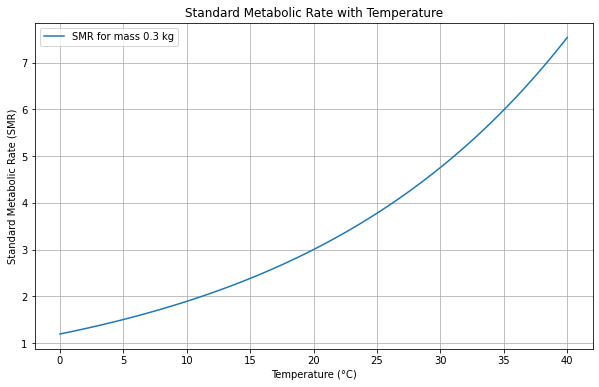

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_smr(log_mass, temperature, X1, X2, X3):
    """
    Calculate SMR based on log-mass, temperature, and constants X1, X2, X3.
    
    Parameters:
    log_mass (float): Logarithm (base 10) of body mass
    temperature (float): Ambient temperature (°C)
    X1 (float): Constant X1
    X2 (float): Temperature coefficient
    X3 (float): Constant X3

    Returns:
    float: Standard Metabolic Rate (SMR)
    """
    log_smr = X1 + log_mass + X2 * temperature + X3
    return 10**log_smr

# Example parameters
log_mass = np.log10(0.3)  # Logarithm of body mass (0.3 kg)
temperature_range = np.linspace(0, 40, 100)  # Temperature range from 0 to 40°C
X1 = 0.5
X2 = 0.02
X3 = 0.1

# Calculate SMR over the temperature range
smr_values = [calculate_smr(log_mass, temp, X1, X2, X3) for temp in temperature_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(temperature_range, smr_values, label=f'SMR for mass 0.3 kg')
plt.xlabel('Temperature (°C)')
plt.ylabel('Standard Metabolic Rate (SMR)')
plt.title('Standard Metabolic Rate with Temperature')
plt.legend()
plt.grid(True)
plt.show()

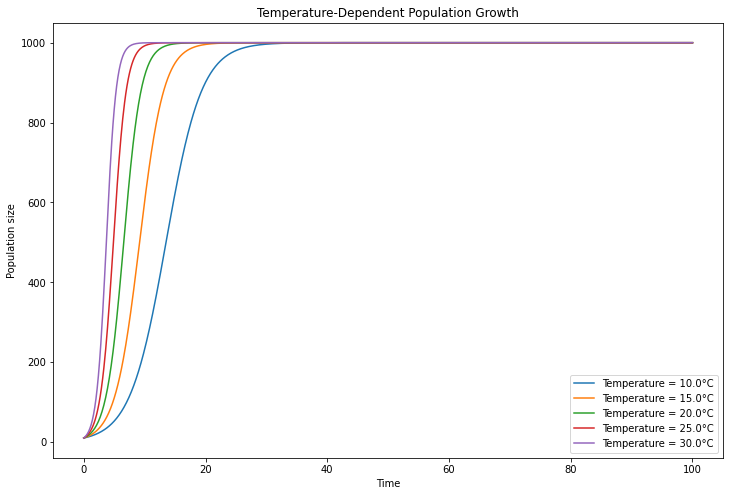

In [12]:
from scipy.integrate import odeint
K = 1000  # Carrying capacity
a, b, c, d = 0.1, 0.02, 0.0003, 0.00001  # Coefficients for polynomial regression model

def growth_rate(T):
    return a + b*T + c*T**2 + d*T**3

def population_growth(N, t, T):
    r_T = growth_rate(T)
    return r_T * N * (1 - N / K)

# Initial population size
N0 = 10

# Time points
t = np.linspace(0, 100, 1000)

# Temperatures to simulate
temperatures = np.linspace(10, 30, 5)  # Example range of temperatures

# Plot results for each temperature
plt.figure(figsize=(12, 8))

for T in temperatures:
    N = odeint(population_growth, N0, t, args=(T,))
    plt.plot(t, N, label=f'Temperature = {T}°C')

plt.xlabel('Time')
plt.ylabel('Population size')
plt.title('Temperature-Dependent Population Growth')
plt.legend()
plt.show()


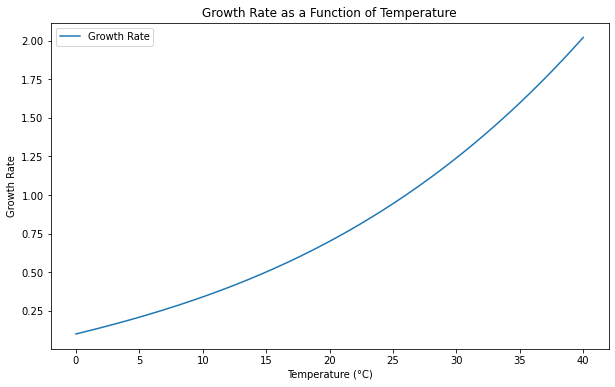

In [13]:
# Temperature range
temperatures = np.linspace(0, 40, 400)  # Example range of temperatures

# Calculate growth rates for each temperature
growth_rates = growth_rate(temperatures)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(temperatures, growth_rates, label='Growth Rate')
plt.xlabel('Temperature (°C)')
plt.ylabel('Growth Rate')
plt.title('Growth Rate as a Function of Temperature')
plt.legend()
plt.show()


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd

# Define the criteria and alternatives
microhabitats = ['Shrub', 'Open', 'Burrow']
behaviors = ['Rest', 'Thermoregulate', 'Forage']

# Define weights for behaviors
weights = {
    'Rest': 0.4,
    'Thermoregulate': 0.3,
    'Forage': 0.3
}

# Define the availability of each microhabitat
availability = {
    'Shrub': 0.4,
    'Open': 0.1,
    'Burrow': 1
}

# Define utility scores for behaviors in different microhabitats
utility_scores = {
    'Shrub': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Open': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Burrow': {
        'Rest': 5,
        'Thermoregulate': 5,
        'Forage': 0
    }
}

# Number of snakes
num_snakes = 100

# Function to calculate overall utility using additive method
def calculate_overall_utility_additive(utility_scores, availability, weights):
    overall_utility = {}
    for habitat in utility_scores:
        habitat_utilities = []
        for behavior in utility_scores[habitat]:
            habitat_utilities.append(utility_scores[habitat][behavior] * weights[behavior])
        overall_utility[habitat] = sum(habitat_utilities) * availability[habitat]
    return overall_utility

# Function to calculate overall utility using multiplicative method
def calculate_overall_utility_multiplicative(utility_scores, availability, weights, epsilon=1e-10):
    overall_utility = {}
    for habitat in utility_scores:
        habitat_utilities = []
        for behavior in utility_scores[habitat]:
            habitat_utilities.append(utility_scores[habitat][behavior] ** weights[behavior])
        overall_utility[habitat] = np.prod(habitat_utilities) * availability[habitat] + epsilon
    return overall_utility

# Calculate overall utilities for each microhabitat using additive utility function
overall_utility_additive = calculate_overall_utility_additive(utility_scores, availability, weights)

# Calculate overall utilities for each microhabitat using multiplicative utility function
overall_utility_multiplicative = calculate_overall_utility_multiplicative(utility_scores, availability, weights)

# Function to simulate snake decisions
def simulate_snake_decisions(num_snakes, overall_utility, behaviors, utility_scores):
    decisions = []
    for _ in range(num_snakes):
        # Choose microhabitat based on overall utility
        habitat_probs = np.array(list(overall_utility.values()))
        habitat_probs /= np.sum(habitat_probs)
        microhabitat = np.random.choice(list(overall_utility.keys()), p=habitat_probs)
        
        # Choose behavior within the selected microhabitat
        behavior_utilities = [utility_scores[microhabitat][behavior] for behavior in behaviors]
        behavior_probs = np.array(behavior_utilities) / np.sum(behavior_utilities)
        behavior = np.random.choice(behaviors, p=behavior_probs)
        
        decisions.append((microhabitat, behavior))
    return decisions

# Simulate snake decisions using the additive utility function
decisions_additive = simulate_snake_decisions(num_snakes, overall_utility_additive, behaviors, utility_scores)

# Simulate snake decisions using the multiplicative utility function
decisions_multiplicative = simulate_snake_decisions(num_snakes, overall_utility_multiplicative, behaviors, utility_scores)

# Convert decisions to DataFrame for analysis
df_decisions_additive = pd.DataFrame(decisions_additive, columns=['Microhabitat', 'Behavior'])
df_decisions_multiplicative = pd.DataFrame(decisions_multiplicative, columns=['Microhabitat', 'Behavior'])

# Print the decision counts
print("Additive Utility Decisions:")
print(df_decisions_additive.value_counts())
print("\nMultiplicative Utility Decisions:")
print(df_decisions_multiplicative.value_counts())


Additive Utility Decisions:
Microhabitat  Behavior      
Burrow        Rest              42
              Thermoregulate    38
Shrub         Forage             9
              Thermoregulate     8
Open          Thermoregulate     2
              Forage             1
Name: count, dtype: int64

Multiplicative Utility Decisions:
Microhabitat  Behavior      
Burrow        Thermoregulate    27
Shrub         Thermoregulate    21
Open          Thermoregulate    14
              Forage            13
Shrub         Forage            13
Burrow        Rest              12
Name: count, dtype: int64


In [14]:
import numpy as np
import pandas as pd

# Define the criteria and alternatives
microhabitats = ['Shrub', 'Open', 'Burrow']
behaviors = ['Rest', 'Thermoregulate', 'Forage']

# Define the availability of each microhabitat
availability = {
    'Shrub': 0.8,
    'Open': 0.2,
    'Burrow': 1.0
}

# Define utility scores for behaviors in different microhabitats, including negative scores for costs
utility_scores = {
    'Shrub': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Open': {
        'Rest': 0,
        'Thermoregulate': 4,
        'Forage': 4
    },
    'Burrow': {
        'Rest': 5,
        'Thermoregulate': 5,
        'Forage': 0
    }
}
# Number of snakes
num_snakes = 100

# Generate individual-specific weights for behaviors
def generate_individual_weights(num_snakes):
    weights = []
    for _ in range(num_snakes):
        rest_weight = np.random.uniform(0.2, 0.5)
        thermoregulate_weight = np.random.uniform(0.2, 0.5)
        forage_weight = 1 - rest_weight - thermoregulate_weight
        weights.append({
            'Rest': rest_weight,
            'Thermoregulate': thermoregulate_weight,
            'Forage': forage_weight
        })
    return weights

individual_weights = generate_individual_weights(num_snakes)

# Define different utility functions
def linear_utility(x, a=0, b=1):
    return a + b * x

def additive_utility(utilities, weights):
    return sum(w * u for w, u in zip(weights, utilities))

def multiplicative_utility(utilities, weights, epsilon=1e-10):
    return np.prod([max(u, epsilon) ** w for u, w in zip(utilities, weights)])

def exponential_utility(x, a=1):
    return 1 - np.exp(-a * x)

# Function to calculate overall utility using a combination of utility functions
def calculate_combined_utility(utility_scores, availability, individual_weight):
    overall_utility = {}
    for habitat in utility_scores:
        habitat_utilities = []
        for behavior in utility_scores[habitat]:
            linear_part = linear_utility(utility_scores[habitat][behavior])
            exp_part = exponential_utility(utility_scores[habitat][behavior])
            habitat_utilities.append(individual_weight[behavior] * (linear_part + exp_part))
        
        additive_part = additive_utility(habitat_utilities, list(individual_weight.values()))
        multiplicative_part = multiplicative_utility(habitat_utilities, list(individual_weight.values()))
        
        overall_utility[habitat] = (additive_part + multiplicative_part) * availability[habitat]
    return overall_utility

# Function to simulate snake decisions
def simulate_snake_decisions(num_snakes, individual_weights, behaviors, utility_scores, availability):
    decisions = []
    for i in range(num_snakes):
        individual_weight = individual_weights[i]
        overall_utility = calculate_combined_utility(utility_scores, availability, individual_weight)
        
        # Choose microhabitat based on overall utility
        habitat_probs = np.array(list(overall_utility.values()))
        habitat_probs /= np.sum(habitat_probs)
        microhabitat = np.random.choice(list(overall_utility.keys()), p=habitat_probs)
        
        # Choose behavior within the selected microhabitat
        behavior_utilities = [utility_scores[microhabitat][behavior] for behavior in behaviors]
        behavior_probs = np.array(behavior_utilities) / np.sum(behavior_utilities)
        behavior = np.random.choice(behaviors, p=behavior_probs)
        
        decisions.append((microhabitat, behavior))
    return decisions

# Simulate snake decisions using the individual-specific weights
decisions_combined = simulate_snake_decisions(num_snakes, individual_weights, behaviors, utility_scores, availability)

# Convert decisions to DataFrame for analysis
df_decisions_combined = pd.DataFrame(decisions_combined, columns=['Microhabitat', 'Behavior'])

# Print the decision counts
print("Combined Utility Decisions with Individual-Specific Weights:")
print(df_decisions_combined.value_counts())

Combined Utility Decisions with Individual-Specific Weights:
Microhabitat  Behavior      
Burrow        Rest              31
              Thermoregulate    30
Shrub         Thermoregulate    17
              Forage            13
Open          Forage             6
              Thermoregulate     3
Name: count, dtype: int64


In [5]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set up the parameters
r = 1.0      # Growth rate of prey
a = 0.1      # Predation rate coefficient
b = 0.1      # Reproduction rate of predators per prey eaten
m = 0.5      # Mortality rate of predators
D_N = 0.1    # Diffusion coefficient for prey
D_P = 0.05   # Diffusion coefficient for predators

# Set up the grid
size = 100          # Grid size
dx = 1.0            # Spatial step
dt = 0.01           # Time step
time_steps = 1000   # Number of time steps

# Initialize prey and predator populations
N = np.random.rand(size, size)  # Initial prey distribution
P = np.random.rand(size, size)  # Initial predator distribution

def laplacian(Z):
    """Compute the Laplacian of matrix Z"""
    return (np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
            np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1) -
            4 * Z) / (dx ** 2)

# Set up the figure and axis
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    global N, P
    # Compute the Laplacians
    lap_N = laplacian(N)
    lap_P = laplacian(P)
    
    # Update equations
    dNdt = D_N * lap_N + r * N - a * N * P
    dPdt = D_P * lap_P + b * N * P - m * P
    
    # Update populations
    N += dNdt * dt
    P += dPdt * dt
    
    # Clear the previous frame
    ax[0].cla()
    ax[1].cla()
    
    # Plot prey population
    ax[0].imshow(N, cmap='viridis', vmin=0, vmax=2)
    ax[0].set_title("Prey Population")
    ax[0].axis('off')
    
    # Plot predator population
    ax[1].imshow(P, cmap='plasma', vmin=0, vmax=2)
    ax[1].set_title("Predator Population")
    ax[1].axis('off')

# Animate the simulation
ani = FuncAnimation(fig, update, frames=time_steps, interval=50)

plt.show()


Using matplotlib backend: TkAgg
